# Value object

In [ ]:
# | default_exp core

In [ ]:
#|export
from fastcore.test import *

In [ ]:
#|export
class Value:

    def __init__(self, data, _children=(), _op=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+") 
        return out
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")

In [ ]:
assert (Value(1) + Value(2)).data == (Value(3)).data
assert (Value(1) * Value(2)).data == (Value(2)).data
assert (Value(1) + Value(2) * Value(3)).data == (Value(7)).data

In [ ]:
from graphviz import Digraph

def trace(root):
    # builds a set of nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label=f"data: {n.data}", shape="record")
        if n._op:
            dot.node(name=f"op_{uid}", label=n._op)
            dot.edge(f"op_{uid}", uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), f"op_{str(id(n2))}")
    return dot

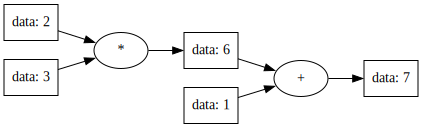

In [ ]:
draw_dot(Value(1) + Value(2) * Value(3))